### Modeling COCO - QA
* [Review](https://arxiv.org/abs/1610.01465)

### Setup Environment:

In [1]:
import os
import pandas as pd

from src.classifiers import preprocess_data, process_labels,split_data

from src.classifiers import VQADataset
from torch.utils.data import DataLoader

from src.classifiers_cpu_metrics import train_early_fusion, train_late_fusion

In [2]:
PATH = 'Embeddings_vlm/coco-qa/'
FILE = 'embeddings_clip.csv'

FILE_PATH = os.path.join(PATH, FILE)

## Get data

In [3]:
df = pd.read_csv(FILE_PATH)
df.drop(columns=['image_id'], inplace=True)
df.head()

questions    answers  types  split  \
0  what is using umbrellas as a central theme  sculpture      0  train   
1  what walks toward the rope perimeter fence   elephant      0  train   
2             what is the color of the horses      brown      2  train   
3          where is the black cat laying down       sink      3  train   
4          what is the color of the character     purple      2  train   

   image_embedding_0  image_embedding_1  image_embedding_2  image_embedding_3  \
0          -0.002133           0.026865          -0.009941          -0.000407   
1          -0.037488          -0.025273           0.021552           0.056967   
2          -0.050188           0.034539           0.008536           0.017248   
3          -0.003502           0.007140           0.014187           0.052844   
4           0.046207           0.050791          -0.010908           0.025887   

   image_embedding_4  image_embedding_5  ...  text_embedding_502  \
0          -0.001535           0.043021  ...            0.013656   
1           0.010018          -0.042177  ...           -0.007028   
2           0.027789          -0.020876  ...            0.009025   
3           0.012376          -0.005956  ...           -0.012388   
4          -0.029377          -0.023032  ...           -0.009319   

   text_embedding_503  text_embedding_504  text_embedding_505  \
0            0.006139            0.018542           -0.027902   
1           -0.002520            0.001875           -0.028708   
2            0.000571           -0.022466            0.010579   
3            0.034164            0.007408            0.029274   
4           -0.034246            0.002291           -0.004910   

   text_embedding_506  text_embedding_507  text_embedding_508  \
0           -0.010581            0.001189           -0.018054   
1            0.016469           -0.011620           -0.010105   
2           -0.025592            0.034800           -0.007262   
3           -0.018850           -0.007775            0.033192   
4           -0.025292            0.012616           -0.017789   

   text_embedding_509  text_embedding_510  text_embedding_511  
0            0.006616            0.039209           -0.052176  
1            0.034845           -0.021513            0.029620  
2            0.010370           -0.009308            0.008854  
3            0.001180           -0.041182            0.004494  
4           -0.012675           -0.004709            0.028756  

[5 rows x 1028 columns]

## Data Perparation

In [4]:
# Split the data
train_df, test_df = split_data(df)

# Select features and labels vectors
text_columns = [column for column in df.columns if 'text' in column] #[f'text_{i}']
image_columns = [column for column in df.columns if 'image' in column] #[f'image_{i}']
label_columns = 'answers'


# Process and one-hot encode labels for training set
train_labels, mlb, train_columns = process_labels(train_df, col=label_columns)
test_labels = process_labels(test_df, col=label_columns, train_columns=train_columns)


train_dataset = VQADataset(train_df, text_columns, image_columns, label_columns, mlb, train_columns)
test_dataset = VQADataset(test_df, text_columns, image_columns, label_columns, mlb, train_columns)


train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True, num_workers=2)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False, num_workers=2)

Train Shape: (78736, 1028)
Test Shape: (38948, 1028)


### Models

In [5]:
text_input_size = len(text_columns)
image_input_size = len(image_columns)
output_size = len(mlb.classes_)
multilabel = False

Training Early Fusion Model:
Model Memory Usage: 0.71 MB
The number of parameters of the model are: 186926


STAGE:2024-02-07 17:39:00 48204:48204 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/10 - Test Accuracy: 0.3967
Epoch 1/10 - Training Time: 6.69 seconds | Inference Time: 3.00 seconds
Epoch 2/10 - Test Accuracy: 0.4088
Epoch 2/10 - Training Time: 6.02 seconds | Inference Time: 3.14 seconds
Epoch 3/10 - Test Accuracy: 0.4330
Epoch 3/10 - Training Time: 7.17 seconds | Inference Time: 3.34 seconds
Epoch 4/10 - Test Accuracy: 0.4300
Epoch 4/10 - Training Time: 7.21 seconds | Inference Time: 3.40 seconds
Epoch 5/10 - Test Accuracy: 0.4424
Epoch 5/10 - Training Time: 7.37 seconds | Inference Time: 3.47 seconds
Epoch 6/10 - Test Accuracy: 0.4453
Epoch 6/10 - Training Time: 6.98 seconds | Inference Time: 3.50 seconds
Epoch 7/10 - Test Accuracy: 0.4472
Epoch 7/10 - Training Time: 7.42 seconds | Inference Time: 3.54 seconds
Epoch 8/10 - Test Accuracy: 0.4504
Epoch 8/10 - Training Time: 7.86 seconds | Inference Time: 3.30 seconds
Epoch 9/10 - Test Accuracy: 0.4548
Epoch 9/10 - Training Time: 7.52 seconds | Inference Time: 3.65 seconds
Epoch 10/10 - Test Accuracy: 0.4591
E

STAGE:2024-02-07 17:40:58 48204:48204 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-07 17:40:59 48204:48204 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         8.10%        7.405s        57.57%       52.616s       4.274ms      -4.26 Gb      -5.72 Gb         12310  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        34.23%       31.284s        34.80%       31.806s       1.727ms       6.37 Gb       6.36 Gb         18420  
                                   DataParallel.forward         2.93%        2.674s        19.75%       18.052s     981.101us       6.40 Gb      -2.51

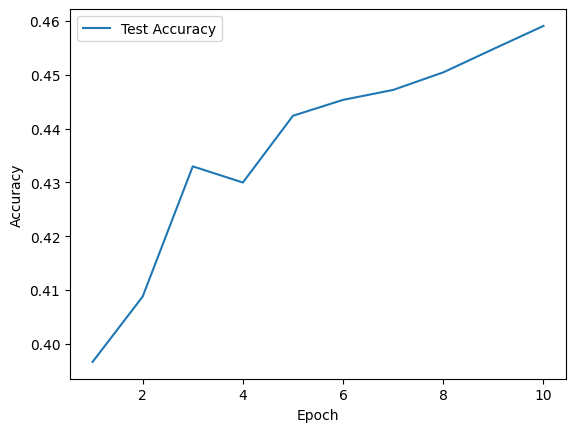

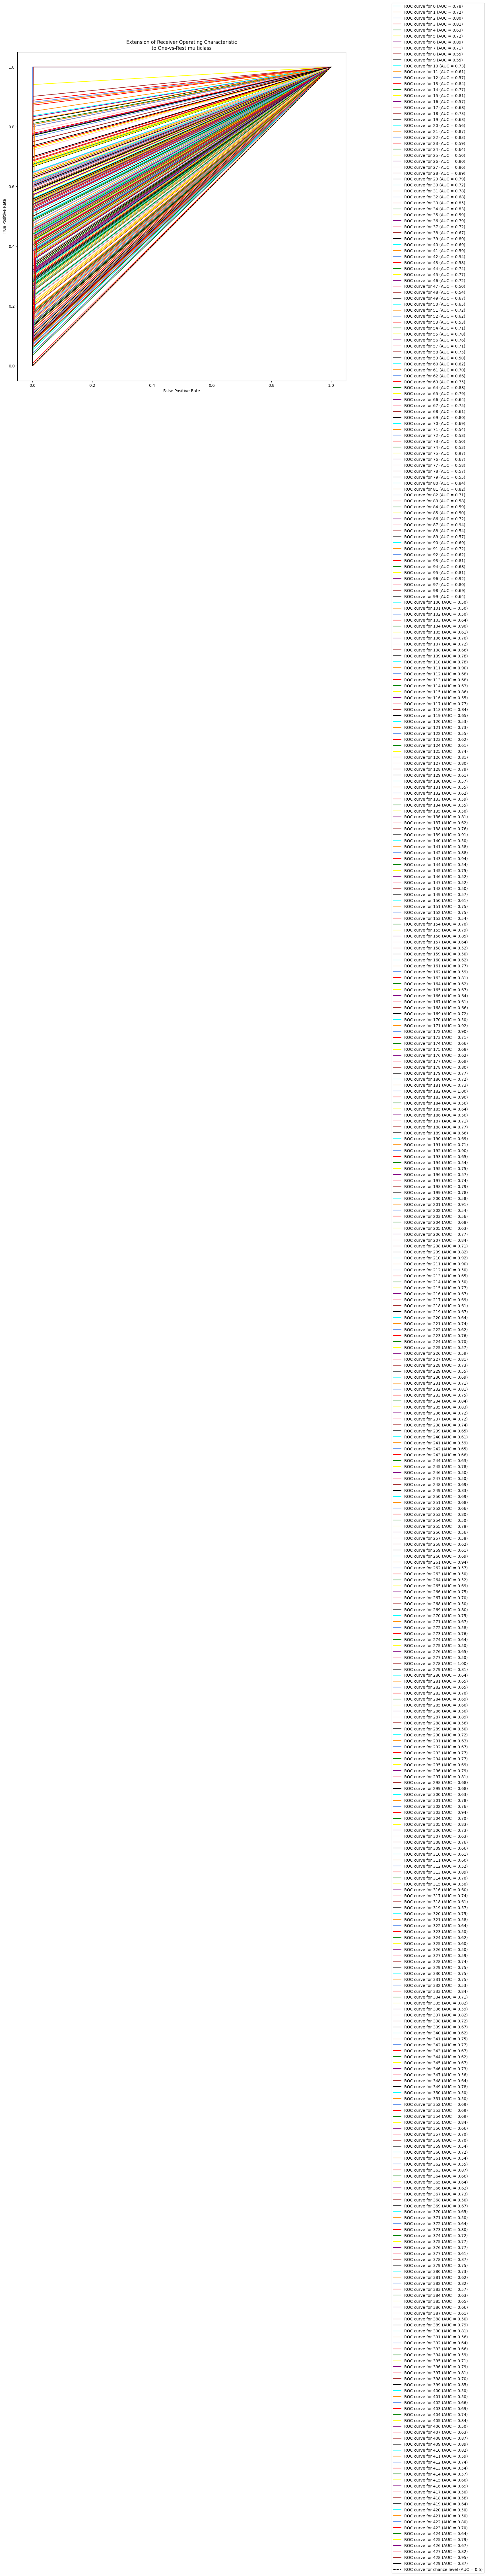

              precision    recall  f1-score   support

           0       0.13      0.56      0.21        41
           1       0.67      0.44      0.53       439
           2       0.67      0.61      0.64       163
           3       0.41      0.62      0.49        32
           4       0.06      0.27      0.10        15
           5       0.33      0.44      0.38        34
           6       0.62      0.77      0.69        31
           7       0.17      0.42      0.24        12
           8       0.06      0.10      0.07        10
           9       0.06      0.10      0.08        21
          10       0.20      0.45      0.28        11
          11       0.13      0.23      0.17        52
          12       0.09      0.14      0.11        29
          13       0.87      0.67      0.76       309
          14       0.63      0.53      0.58       116
          15       0.63      0.62      0.62        97
          16       0.12      0.14      0.13         7
          17       0.22    

In [6]:
# Train early fusion model
print("Training Early Fusion Model:")
train_early_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=10, multilabel=multilabel, report=True, p=0.2)

Training Late Fusion Model:
Model Memory Usage: 0.46 MB
The number of parameters of the model are: 121390


STAGE:2024-02-07 17:50:57 48204:48204 ActivityProfilerController.cpp:312] Completed Stage: Warm Up


Epoch 1/10 - Test Accuracy: 0.4194
Epoch 1/10 - Training Time: 9.75 seconds | Inference Time: 4.34 seconds
Epoch 2/10 - Test Accuracy: 0.4219
Epoch 2/10 - Training Time: 10.29 seconds | Inference Time: 4.42 seconds
Epoch 3/10 - Test Accuracy: 0.4259
Epoch 3/10 - Training Time: 10.45 seconds | Inference Time: 4.57 seconds
Epoch 4/10 - Test Accuracy: 0.4378
Epoch 4/10 - Training Time: 11.33 seconds | Inference Time: 4.53 seconds
Epoch 5/10 - Test Accuracy: 0.4451
Epoch 5/10 - Training Time: 10.31 seconds | Inference Time: 4.31 seconds
Epoch 6/10 - Test Accuracy: 0.4385
Epoch 6/10 - Training Time: 9.26 seconds | Inference Time: 4.04 seconds
Epoch 7/10 - Test Accuracy: 0.4396
Epoch 7/10 - Training Time: 9.30 seconds | Inference Time: 4.19 seconds
Epoch 8/10 - Test Accuracy: 0.4600
Epoch 8/10 - Training Time: 9.93 seconds | Inference Time: 4.12 seconds
Epoch 9/10 - Test Accuracy: 0.4606
Epoch 9/10 - Training Time: 9.56 seconds | Inference Time: 4.06 seconds
Epoch 10/10 - Test Accuracy: 0.46

STAGE:2024-02-07 17:53:41 48204:48204 ActivityProfilerController.cpp:318] Completed Stage: Collection
STAGE:2024-02-07 17:53:41 48204:48204 ActivityProfilerController.cpp:322] Completed Stage: Post Processing


-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                                   Name    Self CPU %      Self CPU   CPU total %     CPU total  CPU time avg       CPU Mem  Self CPU Mem    # of Calls  
-------------------------------------------------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  ------------  
                                         training_batch         8.94%       10.537s        72.44%       85.389s       4.641ms      -5.13 Gb      -7.85 Gb         18400  
enumerate(DataLoader)#_MultiProcessingDataLoaderIter...        27.06%       31.894s        27.51%       32.425s       1.760ms       6.37 Gb       6.36 Gb         18420  
                              Optimizer.step#AdamW.step         5.91%        6.965s        24.60%       28.993s       2.355ms     948.40 Kb     -10.90

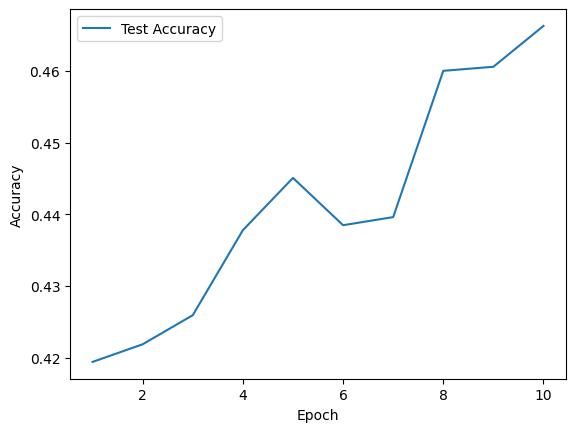

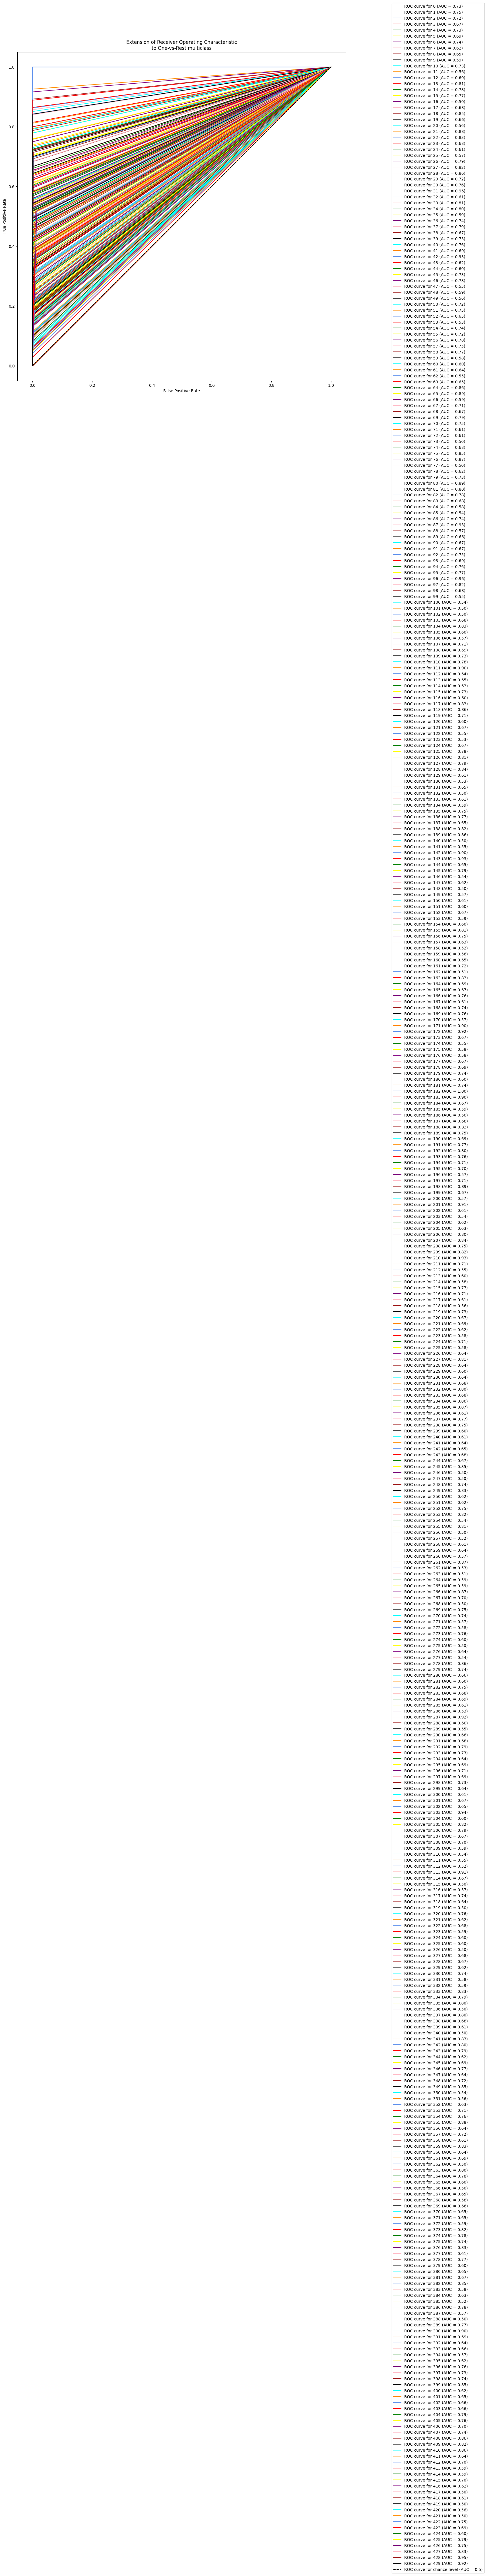

              precision    recall  f1-score   support

           0       0.13      0.46      0.20        41
           1       0.69      0.51      0.59       439
           2       0.67      0.44      0.53       163
           3       0.50      0.34      0.41        32
           4       0.05      0.47      0.09        15
           5       0.37      0.38      0.38        34
           6       0.62      0.48      0.55        31
           7       0.17      0.25      0.20        12
           8       0.14      0.30      0.19        10
           9       0.13      0.19      0.16        21
          10       0.12      0.45      0.19        11
          11       0.13      0.12      0.12        52
          12       0.17      0.21      0.19        29
          13       0.89      0.62      0.73       309
          14       0.65      0.55      0.60       116
          15       0.54      0.54      0.54        97
          16       0.00      0.00      0.00         7
          17       0.18    

In [7]:
# Train late fusion model
print("Training Late Fusion Model:")
train_late_fusion(train_loader, test_loader, text_input_size, image_input_size, output_size, num_epochs=10, multilabel=multilabel, report=True, p=0.2)